In [10]:
import pandas as pd
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

## 1. Sample secondary raster at unknown locations
#### Make grid across area for kriging

In [7]:
xmin = 320000; xmax = 356000              # range of x values
ymin = 3050000; ymax = 3077500               # range of y values
xran = xmax-xmin; yran = ymax-ymin
xsiz = 1000; ysiz = 1000                   # cell size

x_side = np.linspace(xmin+(0.5*xsiz),xmax-(0.5*xsiz),xran//xsiz)
y_side = np.linspace(ymin+(0.5*xsiz),ymax-(0.5*ysiz),yran//ysiz)
X_CELL, Y_CELL = np.meshgrid(x_side,y_side)
CELL = np.array([np.hstack(X_CELL),np.hstack(Y_CELL)])

In [42]:
X_CELL.shape[0]

27

In [8]:
SAMPLING = pd.DataFrame(CELL.T).rename(columns={0:'X',1:'Y'})

In [14]:
SAMPLING.head()

,X,Y
0,320500.0,3050500.0
1,321500.0,3050500.0
2,322500.0,3050500.0
3,323500.0,3050500.0
4,324500.0,3050500.0


Text(0, 0.5, 'Northing [m]')

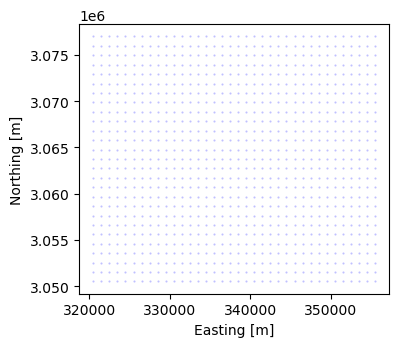

In [39]:
fig, ax = plt.subplots(figsize=(4,3.5))
ax.plot(SAMPLING['X'],SAMPLING['Y'],marker='o',color='b',lw=0,ms=0.5,alpha=0.25)
ax.set_xlabel('Easting [m]'); ax.set_ylabel('Northing [m]')

#### Secondary data used in this example is the topography. The following is used to sample the DEM at the unknown location points. To be used later in the multi-gaussian kriging. Code can be used for any raster sampling.

In [27]:
DEM = rio.open('DEM.tif')
coords = [(x,y) for x, y in zip(SAMPLING['X'], SAMPLING['Y'])]
SAMPLING['DEM'] = [x[0] for x in DEM.sample(coords)]

In [28]:
SAMPLING.to_excel('SAMPLE_DEM.xlsx')

In [29]:
SAMPLING

,X,Y,DEM
0,320500.0,3050500.0,1680.167358
1,321500.0,3050500.0,1455.822510
2,322500.0,3050500.0,1250.320557
3,323500.0,3050500.0,1461.302246
4,324500.0,3050500.0,1443.099243
...,...,...,...
967,351500.0,3077000.0,1372.594727
968,352500.0,3077000.0,1171.391357
969,353500.0,3077000.0,1032.701660
970,354500.0,3077000.0,1189.997803


Text(0.5, 1.0, 'Elevation [m AOD]')

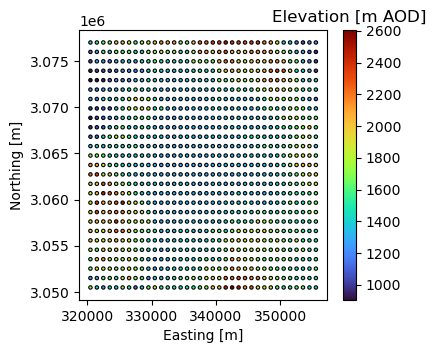

In [38]:
fig, ax = plt.subplots(figsize=(4,3.5))
e = ax.scatter(SAMPLING['X'],SAMPLING['Y'],s=6, c=SAMPLING['DEM'],marker='o',cmap=plt.cm.turbo,lw=0.8,ec='k')
ax.set_xlabel('Easting [m]'); ax.set_ylabel('Northing [m]')
cbar = plt.colorbar(e,ax=ax)
cbar.ax.set_title('Elevation [m AOD]')